In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Load the dataset
file_path = r'E:\Bearings\Implementations\processed_bearing_data.xlsx'
data = pd.read_excel(file_path)

# Split features (X) and labels (y)
X = data.iloc[:, :-1]  # 9 features
y = data.iloc[:, -1]   # Output labels (4 classes)

# Step 1: Train-Validation-Test split (70%-15%-15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 2: Define the classifiers including additional classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Fine Tree': DecisionTreeClassifier(max_depth=100),
    'Medium Tree': DecisionTreeClassifier(max_depth=20),
    'Coarse Tree': DecisionTreeClassifier(max_depth=4),
    'Linear Discriminant': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant': QuadraticDiscriminantAnalysis(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Linear SVM': SVC(kernel='linear'),
    'Quadratic SVM': SVC(kernel='poly', degree=2),
    'Cubic SVM': SVC(kernel='poly', degree=3),
    'Fine Gaussian SVM': SVC(kernel='rbf', gamma=0.75),
    'Medium Gaussian SVM': SVC(kernel='rbf', gamma=0.3),
    'Coarse Gaussian SVM': SVC(kernel='rbf', gamma=0.1),
    'Fine KNN': KNeighborsClassifier(n_neighbors=1),
    'Medium KNN': KNeighborsClassifier(n_neighbors=10),
    'Weighted KNN': KNeighborsClassifier(n_neighbors=10, weights='distance'),
    'Ensemble Bagged Tree': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50),
    'Ensemble Subspace Discriminant': BaggingClassifier(estimator=LinearDiscriminantAnalysis(), n_estimators=50),
    'Ensemble Subspace KNN': BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10), n_estimators=50),
    'Narrow NN': MLPClassifier(hidden_layer_sizes=(10,), max_iter=500),
    'Medium NN': MLPClassifier(hidden_layer_sizes=(50,), max_iter=500),
    'Wide NN': MLPClassifier(hidden_layer_sizes=(100,), max_iter=500),
    'Bilayered NN': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500),
    'Trilayered NN': MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=500)
}

# Step 3: Train, validate, and test each model
results = {}

for name, clf in classifiers.items():
    # Train
    clf.fit(X_train, y_train)
    
    # Validate
    y_val_pred = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Test
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        'Validation Accuracy': val_accuracy * 100,
        'Test Accuracy': test_accuracy * 100
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df[['Validation Accuracy', 'Test Accuracy']]  # Reorder columns

# Print the results in the format you provided
print("Classifier                            Validation Accuracy    Test Accuracy")
for model_name, result in results_df.iterrows():
    print(f"{model_name:35} {result['Validation Accuracy']:.6f}      {result['Test Accuracy']:.6f}")

# Optional: Save the results to a CSV file
results_df.to_csv('classification_results.csv', index=True)


c:\Users\Muhammad Umar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Muhammad Umar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Classifier                            Validation Accuracy    Test Accuracy
Random Forest                       96.585366      99.514563
Fine Tree                           94.146341      96.116505
Medium Tree                         94.146341      97.572816
Coarse Tree                         96.097561      97.087379
Linear Discriminant                 94.146341      94.174757
Quadratic Discriminant              94.634146      97.572816
Gaussian Naive Bayes                91.219512      94.660194
Linear SVM                          97.073171      99.029126
Quadratic SVM                       87.317073      92.718447
Cubic SVM                           93.658537      97.572816
Fine Gaussian SVM                   97.073171      99.514563
Medium Gaussian SVM                 97.073171      100.000000
Coarse Gaussian SVM                 98.048780      100.000000
Fine KNN                            97.560976      98.058252
Medium KNN                          97.073171      97.572816
Weighted

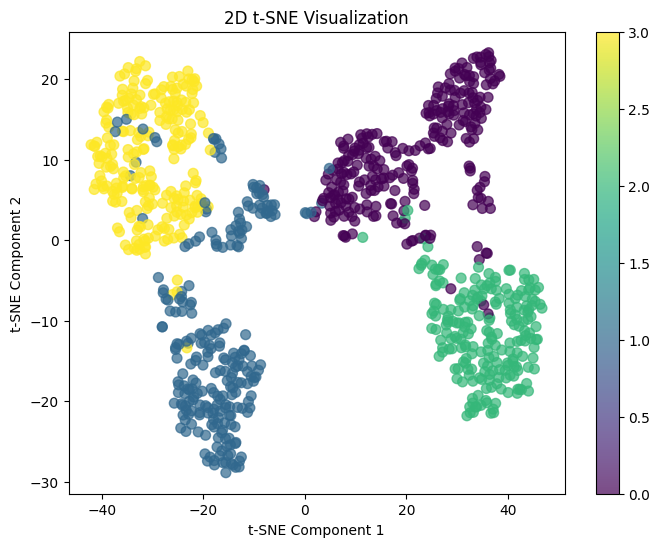

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assume X_train and y_train are your data and labels
# Perform t-SNE to reduce the dataset to 2 dimensions
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X_train)

# Plot t-SNE in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.7)
plt.colorbar()
plt.title("2D t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()
